# Recitation 1
### 30.Sep.22
#### Mariana Martínez Aguilar

The objective of today's recitation is to explore PGD and different step sizes $\alpha$. 

### Rosenbrock function
In mathematical optimization, the Rosenbrock function is a non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as Rosenbrock's valley or Rosenbrock's banana function.

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

The function originally has two parameters, $a$ and $b$ but in this case we will set $a = 1.5$ and $b = 0.25$. We know that the global optimum is found in $(a, a^2)$. The function in our case is:

$$ f(x, y) = (a - x)^2 + b(y - x^2)^2 = (1.5 - x)^2 + 0.25(y - x^2)^2. $$  

Plot the levels sets on this function on the square [-10,10] x [-10, 10]. Then for the square [-2.5, 2.5] x [-2.5, 2.5], plot this function in 3D, also plot its levels sets (this is a plot in 2D). For the contours plot the point $(a, a^2)$ as well. Use this colormap 'cet_linear_bgy_10_95_c74_r' .

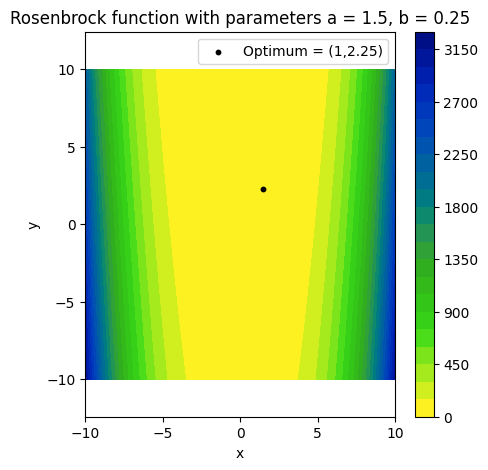

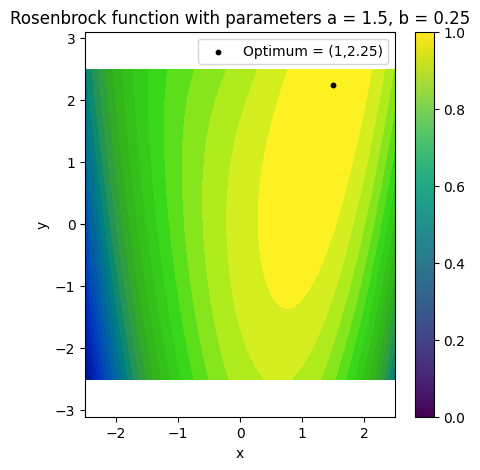

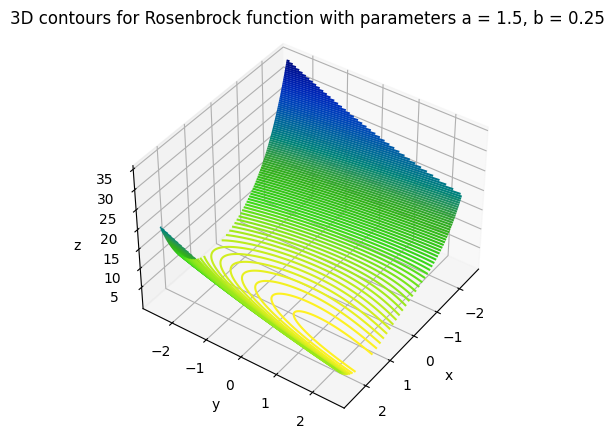

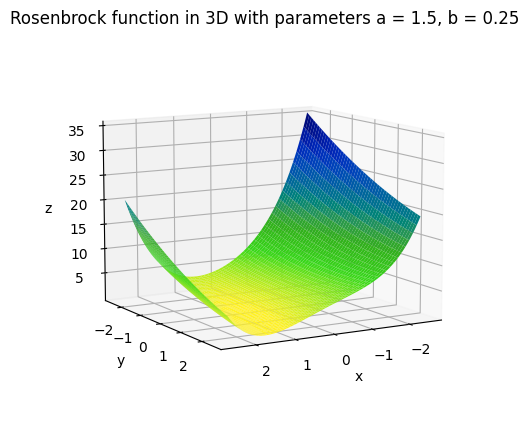

In [1]:
# First thing to do is to import numpy, matplotlib and colorcet
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc  # nice color pallettes

## To plot we first need to define the function
a = 1.5
b = 0.25
def Ros(x, y):
    '''
    Rosenbrock function with parameters a = 1 and b = 4
    '''
    return np.power( a - x, 2 ) + b*np.power( np.subtract( y, 
                                                          np.power(x, 2) ), 2 )

# Start plotting
Nx = 1000 # number of points in the x axis
Ny = 1000 # number of points in the y axis

# Plot on bigger square
x, y = np.meshgrid( np.linspace(-10, 10, Nx), 
                   np.linspace(-10, 10, Ny) )
z = Ros(x, y)

plt.figure(figsize = (5, 5) )
im0 = plt.contourf(x, y, z, levels = 30, 
                   cmap = 'cet_linear_bgy_10_95_c74_r' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
plt.scatter( 1.5, 1.5**2, marker = 'o', s = 10, c = 'black', 
            label = 'Optimum = (1,2.25)' )
plt.legend()
plt.colorbar(im0)
plt.show(block = False)

# Plot on the smaller square
x, y = np.meshgrid( np.linspace(-2.5, 2.5, Nx), 
                   np.linspace(-2.5, 2.5, Ny) )
z = Ros(x, y)

plt.figure(figsize = (5, 5) )
im1 = plt.contourf(x, y, z, levels = 30, 
                   cmap = 'cet_linear_bgy_10_95_c74_r' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
plt.scatter( 1.5, 1.5**2, marker = 'o', s = 10, 
            c = 'black', label = 'Optimum = (1,2.25)' )
plt.legend()
plt.colorbar()
plt.show(block = False)

# Contours in 3D
plt.figure(figsize = (5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 100, 
             cmap = 'cet_linear_bgy_10_95_c74_r' )
plt.title('3D contours for Rosenbrock function with parameters a = 1.5, b = 0.25')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
ax.view_init(40, 35)
plt.show(block = False)

# The function as a surface
plt.figure(figsize = (5, 5))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, 
                cmap = 'cet_linear_bgy_10_95_c74_r' )
plt.title('Rosenbrock function in 3D with parameters a = 1.5, b = 0.25')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
ax.view_init(10, 60)
plt.show(block = False)

By just looking at these plots, what do you think is going to be the problem when trying to compute the gradient near the optimal point?

### The optimization problem

Now that we know how this function looks like we can define the following constraint optimization problem:

$$ \text{min  } f(x,y) = (1.5 - x)^2 + 0.25(y - x^2)^2 \\ \text{such that  } x^2 + y^2 \leq 1. $$  

Plot the Rosenbrock function and the feasible set. Use the color map 'cet_linear_wcmr_100_45_c42'. What can you tell about the optimum and such region?

<function matplotlib.pyplot.show(close=None, block=None)>

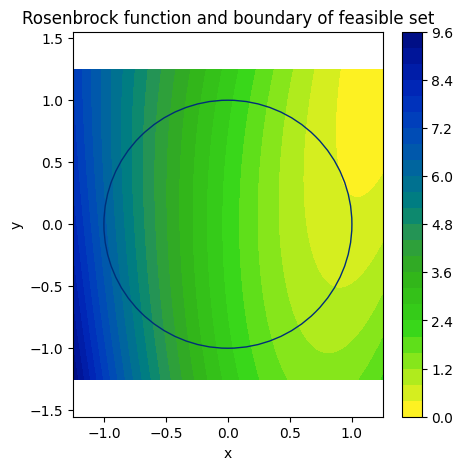

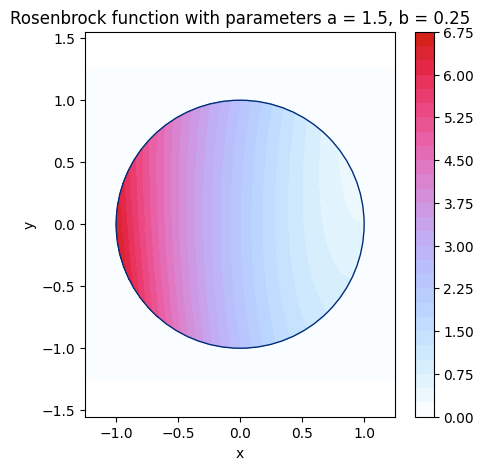

In [2]:
# We have two options, just plot the contours and then add a 
# circle or just plot the contours for those x, y, that are
# in the feasible set

from math import pi

x, y = np.meshgrid( np.linspace(-1.25, 1.25, Nx),
                   np.linspace(-1.25, 1.25, Ny) )
z = Ros(x, y)

# First option

plt.figure(figsize = (5, 5) )
im2 = plt.contourf(x, y, z, levels = 30, 
                   cmap = 'cet_linear_bgy_10_95_c74_r' )
plt.axis('equal')
plt.title('Rosenbrock function and boundary of feasible set')
circle = plt.Circle((0.0, 0.0), 1, 
                    color = '#002e79', fill = False)
ax = plt.gca()
ax.add_patch(circle)
plt.ylabel('y')
plt.xlabel('x')
plt.colorbar(im2)

# Second option: just plot those x, y, 
# that are inside the circle
z_circ = np.zeros(x.shape)
for i in range(Nx):
    for j in range(Ny):
        xi = x[i,j]
        yi = y[i, j]
        if xi**2 + yi**2 <= 1:
            z_circ[i,j] = Ros(xi, yi)

plt.figure(figsize = (5, 5) )
im3 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
circle = plt.Circle((0.0, 0.0), 1, 
                    color = '#002e79', fill = False)
ax = plt.gca()
ax.add_patch(circle)
plt.colorbar(im3)

plt.show

Compute the gradient of this function given x, y. What's the dimension of this gradient? Plot the negative gradient on the point $x_{\text{test}} = \left( \frac{\sqrt(2)}{2}, \frac{\sqrt(2)}{2}\right) $. What can you tell from this if we compute gradient descent starting at $x_{\text{test}}$?

<function matplotlib.pyplot.show(close=None, block=None)>

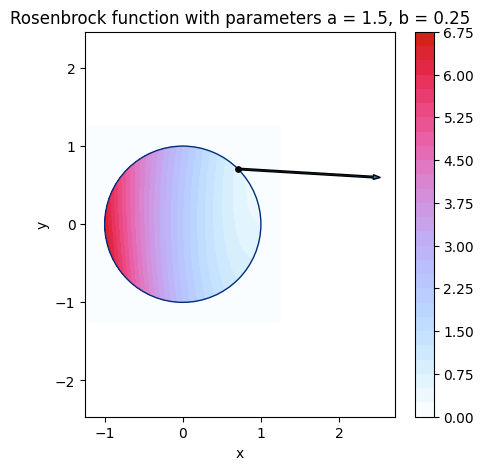

In [3]:
# Define a function that computes the gradient 

from math import sqrt

def gradRosenbrock(x, y):
    '''
    Gradient of the Rosenbrock function
    '''
    grad = np.zeros((2, 1)) # size of the gradient should be this
    grad[0] = -2*a + 4*b*x**3 - 4*b*x*y + 2*x
    grad[1] = 2*b*(y-x**2)
    return grad
# Evaluate
y_test = sqrt(2)/2
x_test = sqrt(2)/2
grad_test = gradRosenbrock(x_test, y_test)

# Plot
plt.figure(figsize = (5, 5) )
im4 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
circle = plt.Circle((0.0, 0.0), 1, 
                    color = '#002e79', fill = False)
ax = plt.gca()
ax.add_patch(circle)
plt.scatter( x_test, y_test, marker = 'o', s = 15, 
            c = 'black')
plt.arrow(x_test, y_test, -grad_test[0, 0], 
          -grad_test[1, 0], width = 0.02)
plt.colorbar(im4)

plt.show


Program the PGD method with backtracking. What is the projection on this domain?

In [4]:
### We need the backtracking function
from numpy.linalg import norm
# Define parameters
beta = 0.8 # we can change this and see what happens
maxIter = 50 # maximum number of iterations allowed
tol = 1e-4 # tolerance allowed in our method
alpha0 = 1 # initial step size, before doing backtracking

def backTr(alpha, xn, yn, direction):
    '''
    Backtracking algorithm. Modifies the step length until
    we've found a descent direction.
    '''
    Fn = Ros(xn, yn)
    xn_1 = xn + alpha*direction[0, 0]
    yn_1 = yn + alpha*direction[1, 0]
    Fn_1 = Ros(xn_1, yn_1)
    while Fn < Fn_1:
        alpha = beta*alpha
        xn_1 = xn + alpha*direction[0,0]
        yn_1 = yn + alpha*direction[1, 0]
        Fn_1 = Ros(xn_1, yn_1)
    return alpha

def projectBack(an, bn):
    '''
    If necessary project the free space
    gradient descent update back to the
    feasible set
    '''
    norm_free = sqrt( an**2 + bn**2 )
    if ( norm_free > 1 ):
        an, bn = an/norm_free, bn/norm_free
    return an, bn

def PGD_Ros(x0, y0):
    '''
    Projected gradient descent for the Rosenbrock function
    on the unit circle
    '''
    xn_vec = [x0] # iterations for x
    yn_vec = [y0] # iterations for y
    F_vec = [Ros(x0, y0)] # function values at the iterations
    i = 0 # counter for the iterations
    d = - gradRosenbrock(x0, y0)  # Initial direction, negative gradient
    alpha = backTr(alpha0, x0, y0, d)
    # Step size, and "free space" gradient descent update
    an, bn = x0 + alpha*d[0,0], y0 + alpha*d[1,0]
    compare = [an, bn]/norm([an, bn]) - [x0, y0]
    # Now we need to project these back to the feasible set
    # BUT JUST PROJECT THEM IF NECESSARY
    xn, yn = projectBack(an, bn)
    xn_vec.append(xn)
    yn_vec.append(yn)
    F_vec.append(Ros(xn, yn))
    i += 1
    while( norm(compare)   >= tol and i < maxIter ):
        d = - gradRosenbrock(xn, yn) 
        alpha = backTr(alpha0, xn, yn, d)
        an, bn = xn + alpha*d[0,0], yn + alpha*d[1,0] # gradient descent
        compare = [an, bn]/norm([an, bn]) - [xn, yn]
        xn, yn = projectBack(an, bn)
        # Add the new values
        xn_vec.append(xn)
        yn_vec.append(yn)
        F_vec.append(Ros(xn, yn))
        i += 1
    return (xn, yn), xn_vec, yn_vec, F_vec, i



Test your PGD function and plot the trajectory starting from 0.1, 0.1

number of iterations  7
Optimal point:  0.9327579421329988 0.3605032890110894


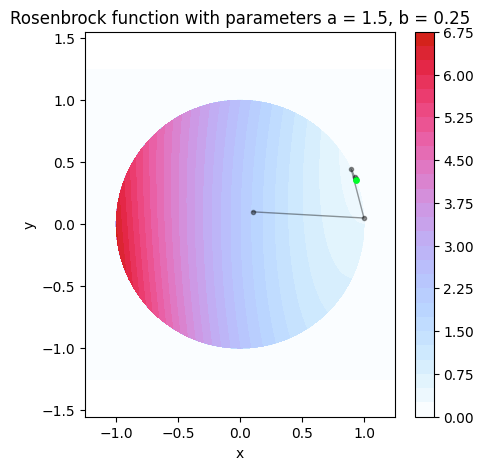

In [5]:
# Define a starting point, 0.1,0.1
x0, y0 = 0.1, 0.1
(xn, yn), xn_vec, yn_vec, F_vec, i = PGD_Ros(x0, y0)
print("number of iterations ", i)
print("Optimal point: ", xn, yn)

# Plot
plt.figure(figsize = (5, 5) )
im5 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
plt.plot( xn_vec, yn_vec, marker = '.', linewidth = 1,
         c = 'black', alpha = 0.4)
plt.scatter(xn, yn, color = '#00ff2a', s = 15, zorder=3)
plt.colorbar(im5)


Test your PGD function and plot the trajectory starting from -0.5, -0.8

number of iterations  7
Optimal point:  0.9327641664956957 0.36048718382432143


<function matplotlib.pyplot.show(close=None, block=None)>

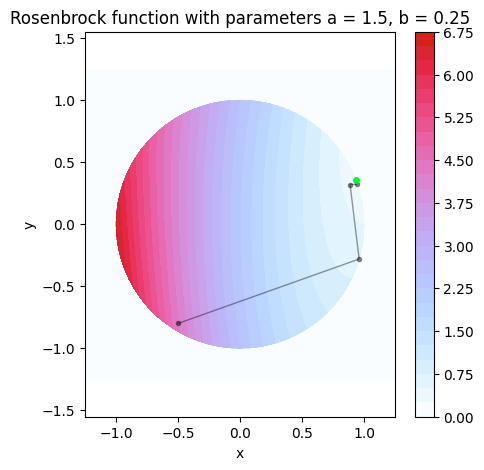

In [6]:
# Define a starting point, let's say -0.5, -0.8
x0, y0 = -0.5, -0.8
(xn, yn), xn_vec, yn_vec, F_vec, i = PGD_Ros(x0, y0)
print("number of iterations ", i)
print("Optimal point: ", xn, yn)

# Plot
plt.figure(figsize = (5, 5) )
im6 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
plt.plot( xn_vec, yn_vec, marker = '.', linewidth = 1,
         c = 'black', alpha = 0.4)
plt.scatter(xn, yn, color = '#00ff2a', s = 15, zorder=3)
plt.colorbar(im6)

plt.show

Test your PGD function and plot the trajectory starting from $\sqrt(2)/2, \sqrt(2)/2$.

number of iterations  6
Optimal point:  0.9327583325534715 0.3605022788444862


<function matplotlib.pyplot.show(close=None, block=None)>

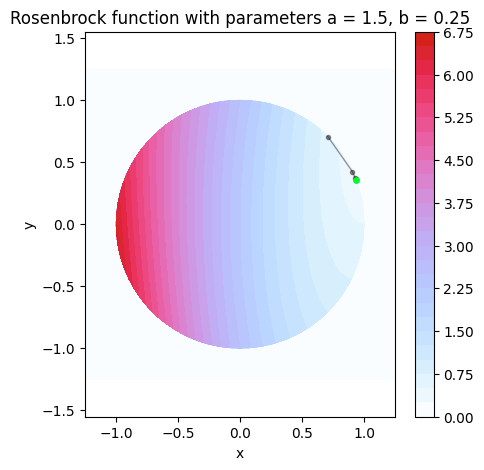

In [7]:
x0, y0 = sqrt(2)/2, sqrt(2)/2
(xn, yn), xn_vec, yn_vec, F_vec, i = PGD_Ros(x0, y0)
print("number of iterations ", i)
print("Optimal point: ", xn, yn)

# Plot
plt.figure(figsize = (5, 5) )
im6 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )
plt.axis('equal')
plt.title('Rosenbrock function with parameters a = 1.5, b = 0.25')
plt.ylabel('y')
plt.xlabel('x')
plt.plot( xn_vec, yn_vec, marker = '.', linewidth = 1,
         c = 'black', alpha = 0.4)
plt.scatter(xn, yn, color = '#00ff2a', s = 15, zorder=3)
plt.colorbar(im6)

plt.show

Notice the number of iterations required for each starting point. Why does this happen?